In [1]:
import numpy as np
import pandas as pd

In [2]:
TRAIN_PATH = "archive/data/data/train/A-3.npy"
TEST_PATH  = "archive/data/data/test/A-3.npy"


In [3]:
X_train = np.load(TRAIN_PATH)
X_test  = np.load(TEST_PATH)

X_train = X_train.reshape(-1, 1)
X_test  = X_test.reshape(-1, 1)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (68400, 1)
Test shape : (205125, 1)


In [4]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(
    n_estimators=100,
    contamination=0.05,   
    random_state=42
)

model.fit(X_train)

print("Model trained on normal behavior.")


Model trained on normal behavior.


In [5]:
predictions = model.predict(X_test)

anomaly_labels = np.where(predictions == -1, 1, 0)

print("Total test points:", len(anomaly_labels))
print("Detected anomalies:", anomaly_labels.sum())


Total test points: 205125
Detected anomalies: 5146


In [6]:
risk_scores = -model.score_samples(X_test)

risk_scores = 100 * (risk_scores - risk_scores.min()) / (risk_scores.max() - risk_scores.min())


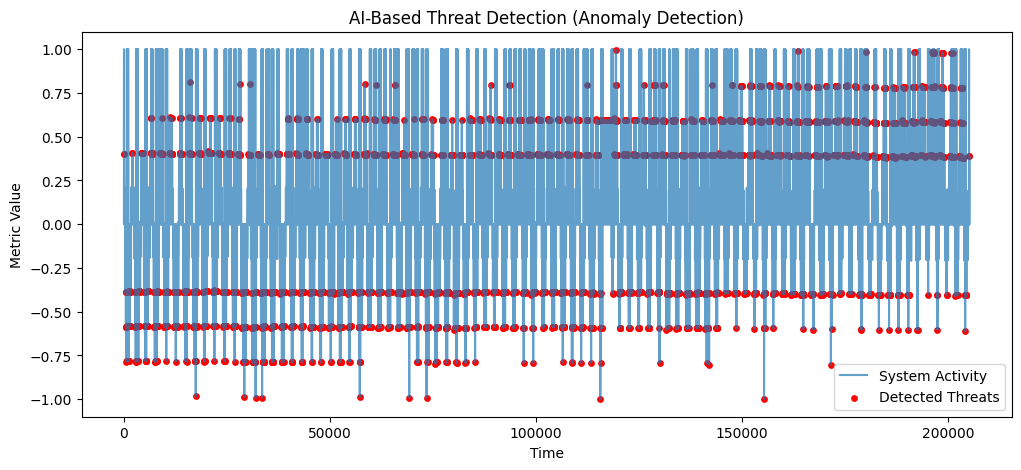

In [8]:
import matplotlib.pyplot as plt
import numpy as np

time_index = np.arange(len(X_test))

plt.figure(figsize=(12,5))

plt.plot(time_index, X_test, label="System Activity", alpha=0.7)

anomaly_points = anomaly_labels == 1

plt.scatter(
    time_index[anomaly_points],
    X_test[anomaly_points],
    color="red",
    label="Detected Threats",
    s=15
)

plt.title("AI-Based Threat Detection (Anomaly Detection)")
plt.xlabel("Time")
plt.ylabel("Metric Value")
plt.legend()
plt.show()


In [9]:
true_labels = np.zeros(len(X_test))
true_labels[2000:2300] = 1


In [10]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, anomaly_labels))


              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99    204825
         1.0       0.00      0.01      0.00       300

    accuracy                           0.97    205125
   macro avg       0.50      0.49      0.49    205125
weighted avg       1.00      0.97      0.99    205125



In [11]:
import joblib

# Save trained model
joblib.dump(model, "threat_detection_model.pkl")

# Load model later
model = joblib.load("threat_detection_model.pkl")


In [12]:
import gradio as gr
import numpy as np
import joblib

model = joblib.load("threat_detection_model.pkl")

def detect_threat(value):
    value = np.array([[value]])
    pred = model.predict(value)
    risk = -model.score_samples(value)[0]

    if pred == -1:
        return f" Suspicious Activity | Risk Score: {risk:.2f}"
    else:
        return f" Normal Activity | Risk Score: {risk:.2f}"

gr.Interface(
    fn=detect_threat,
    inputs="number",
    outputs="text",
    title="AI-Based Cyber Threat Detection"
).launch()


C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
